In [1]:
# Import necessary libraries 
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read pollution.csv file stored as an output from milestone 2, store data in data frame
pollution_df = pd.read_csv("pollution.csv")

# check size of the data frame using shape function for verification
pollution_df.shape

(436876, 22)

In [3]:
# Read population.csv file stored as an output from milestone 3, store data in data frame
population_df = pd.read_csv("population.csv")

# check size of the data frame using shape function for verification
population_df.shape

(3245, 3)

In [4]:
# Read aqs.csv file stored as an output from milestone 4, store data in data frame
aqs_df = pd.read_csv("aqs.csv")

# check size of the data frame using shape function for verification
aqs_df.shape

(100176, 33)

In [5]:
# Check the columns of pollution data frame to see if any column names need to be updated
pollution_df.columns

Index(['Site Num', 'Address', 'State', 'County', 'City', 'Date Local',
       'NO2 Mean', 'NO2 Max Value', 'NO2 Max Hour', 'NO2 AQI', 'O3 Mean',
       'O3 Max Value', 'O3 Max Hour', 'O3 AQI', 'SO2 Mean', 'SO2 Max Value',
       'SO2 Max Hour', 'SO2 AQI', 'CO Mean', 'CO Max Value', 'CO Max Hour',
       'CO AQI'],
      dtype='object')

In [6]:
# Check the columns of population data frame to see if any column names need to be updated
population_df.columns

Index(['County', 'State', 'Population'], dtype='object')

In [7]:
# Check the columns of aqs data frame to see if any column names need to be updated
aqs_df.columns

Index(['address', 'cbsa_code', 'cbsa_name', 'City', 'close_date',
       'county_code', 'County', 'csa_code', 'csa_name', 'datum', 'elevation',
       'last_method_begin_date', 'last_method_code', 'last_method_description',
       'lat_lon_accuracy', 'latitude', 'local_site_name', 'longitude',
       'measurement_scale', 'measurement_scale_def', 'monitor_type',
       'monitoring_agency', 'monitoring_agency_code', 'monitoring_objective',
       'open_date', 'parameter_code', 'parameter_name', 'pl_probe_location',
       'poc', 'si_id', 'site_number', 'state_code', 'State'],
      dtype='object')

In [8]:
# Change Date Local column name in pollution data frame
pollution_df.rename(columns={'Date Local': 'Date'}, inplace=True)

In [9]:
# Change open_date and address column names to Date in aqs data frame
aqs_df.rename(columns={'open_date': 'Date', 'address': 'cbsa_address'}, inplace=True)

In [10]:
# Create a connection to a new database project.db using sqlite3
conn = sqlite3.connect('project.db')

In [11]:
# Load pollution_df data in pollution table
pollution_df.to_sql('pollution', conn)

C:\Users\shilp\anaconda3\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [12]:
# Load population_df data in population table
population_df.to_sql('population', conn)

In [13]:
# Load aqs_df data in aqs table
aqs_df.to_sql('aqs', conn)

In [14]:
# Confirm the creation of aqs table by executing select statement
rows = conn.execute('SELECT * FROM pollution')

In [15]:
# Print first row from the table
for row in rows:
    print(row)
    break

(0, 3002, '1645 E Roosevelt St-Central Phoenix Stn', 'Arizona', 'Maricopa', 'Phoenix', '2000-01-01', 19.041667, 49.0, 19, 46, 22.5, 40.0, 10, 34, 3.0, 9.0, 21, 13.0, 878.9469999999999, 2200.0, 23, 25.0)


In [16]:
# Confirm the creation of population table by executing select statement
rows = conn.execute('SELECT * FROM population')

In [17]:
# Print first row from the table
for row in rows:
    print(row)
    break

(0, 'Autauga', 'Alabama', 55869)


In [18]:
# Confirm the creation of aqs table by executing select statement
rows = conn.execute('SELECT * FROM aqs')

In [19]:
# Print first row from the table
for row in rows:
    print(row)
    break

(0, 'Fairhope High School, 1 Pirate Drive, Fairhope,  Alabama', 19300.0, 'Daphne-Fairhope-Foley, AL', 'Fairhope', '2010-09-17', 3, 'Baldwin', 380.0, 'Mobile-Daphne-Fairhope, AL', 'NAD83', 37.19, '2010-05-17', 126, 'SS CANISTER PRESSURIZED - CRYOGENIC PRECONCENTRATION GC/FID', 4.0, 30.497478000000005, 'FAIRHOPE, Alabama', -87.880258, None, None, 'SPM', 'US EPA/OAQPS', 1108, 'POPULATION EXPOSURE', '2010-05-17', 43236, '2-Ethyl-1-butene', None, 10, 7, 10, 1, 'Alabama')


In [20]:
#Create an sql statement to join three tables: pollution, population, and aqs to create a combined table 
sql = '''
      CREATE TABLE combined AS 
      SELECT * FROM pollution
      INNER JOIN population ON population.State = pollution.State
                            AND population.County = pollution.County
      INNER JOIN aqs        ON aqs.State = pollution.State 
                            AND aqs.County = pollution.County
                            AND aqs.Date = pollution.Date
      '''


In [21]:
# Execute sql statement to create combined table 
conn.execute(sql)

In [22]:
# Commit the changes to the database
conn.commit()

In [23]:
# Confirm the creation of combined table by executing select statement
rows = conn.execute('SELECT * FROM combined')

In [24]:
# Print first row from the table
for row in rows:
    print(row)
    break

(100755, 4002, '1820 S. 51St Ave.', 'Illinois', 'Cook', 'Cicero', '2004-04-21', 14.75, 29.0, 6, 27, 25.583, 29.0, 4, 25, 3.375, 15.0, 6, 21.0, 683.3330000000001, 800.0, 18, 9.0, 617, 'Cook', 'Illinois', 5150233, 29056, '750 Dundee Road', 16980.0, 'Chicago-Naperville-Elgin, IL-IN-WI', 'Northbrook', None, 31, 'Cook', 176.0, 'Chicago-Naperville, IL-IN-WI', 'WGS84', 198.0, '2004-04-21', 126, 'SS CANISTER PRESSURIZED - CRYOGENIC PRECONCENTRATION GC/FID', 10.0, 42.139996000000004, 'NORTHBROOK WATER PLANT', -87.799227, None, None, 'SLAMS', 'Illinois Environmental Protection Agency', 513, 'POPULATION EXPOSURE', '2004-04-21', 43236, '2-Ethyl-1-butene', None, 8, 3783, 4201, 17, 'Illinois')


In [25]:
# Extract data from combined table to a data frame using pandas read_sql_query function 
combined_df = pd.read_sql_query('SELECT * FROM combined', conn)

In [26]:
# Check the first few records of the extracted data frame
combined_df.head()

,index,Site Num,Address,State,County,City,Date,NO2 Mean,NO2 Max Value,NO2 Max Hour,...,monitoring_objective,Date:1,parameter_code,parameter_name,pl_probe_location,poc,si_id,site_number,state_code,State:2
0,100755,4002,1820 S. 51St Ave.,Illinois,Cook,Cicero,2004-04-21,14.75,29.0,6,...,POPULATION EXPOSURE,2004-04-21,43236,2-Ethyl-1-butene,None,8,3783,4201,17,Illinois
1,100755,4002,1820 S. 51St Ave.,Illinois,Cook,Cicero,2004-04-21,14.75,29.0,6,...,POPULATION EXPOSURE,2004-04-21,43236,2-Ethyl-1-butene,None,8,3783,4201,17,Illinois
2,100755,4002,1820 S. 51St Ave.,Illinois,Cook,Cicero,2004-04-21,14.75,29.0,6,...,POPULATION EXPOSURE,2004-04-21,43236,2-Ethyl-1-butene,None,8,3783,4201,17,Illinois
3,100755,4002,1820 S. 51St Ave.,Illinois,Cook,Cicero,2004-04-21,14.75,29.0,6,...,POPULATION EXPOSURE,2004-04-21,43236,2-Ethyl-1-butene,None,8,3783,4201,17,Illinois
4,100755,4002,1820 S. 51St Ave.,Illinois,Cook,Cicero,2004-04-21,14.75,29.0,6,...,POPULATION EXPOSURE,2004-04-21,43236,2-Ethyl-1-butene,None,8,3783,4201,17,Illinois


In [27]:
# Check the size of the extracted data frame
combined_df.shape

(24497, 61)

In [28]:
# Close the database connection
conn.close()

In [29]:
# Review the column names of the extracted data frame
combined_df.columns

Index(['index', 'Site Num', 'Address', 'State', 'County', 'City', 'Date',
       'NO2 Mean', 'NO2 Max Value', 'NO2 Max Hour', 'NO2 AQI', 'O3 Mean',
       'O3 Max Value', 'O3 Max Hour', 'O3 AQI', 'SO2 Mean', 'SO2 Max Value',
       'SO2 Max Hour', 'SO2 AQI', 'CO Mean', 'CO Max Value', 'CO Max Hour',
       'CO AQI', 'index:1', 'County:1', 'State:1', 'Population', 'index:2',
       'cbsa_address', 'cbsa_code', 'cbsa_name', 'City:1', 'close_date',
       'county_code', 'County:2', 'csa_code', 'csa_name', 'datum', 'elevation',
       'last_method_begin_date', 'last_method_code', 'last_method_description',
       'lat_lon_accuracy', 'latitude', 'local_site_name', 'longitude',
       'measurement_scale', 'measurement_scale_def', 'monitor_type',
       'monitoring_agency', 'monitoring_agency_code', 'monitoring_objective',
       'Date:1', 'parameter_code', 'parameter_name', 'pl_probe_location',
       'poc', 'si_id', 'site_number', 'state_code', 'State:2'],
      dtype='object')

<AxesSubplot:ylabel='None'>

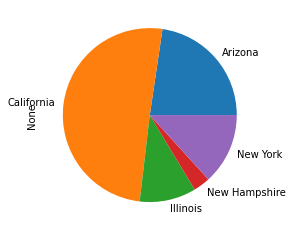

In [30]:
# Pie chart for frequency of State values in the combined data frame
combined_df.groupby('State').size().plot(kind='pie')

<AxesSubplot:xlabel='County'>

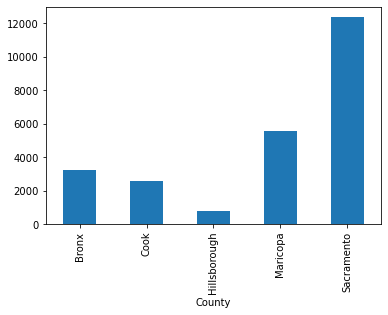

In [31]:
# Bar chart for frequency of County values in the combined data frame
combined_df.groupby('County').size().plot(kind='bar')

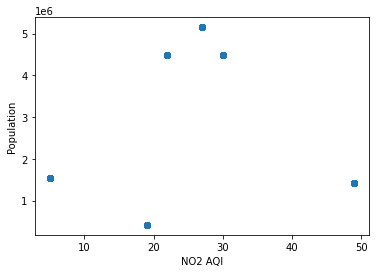

In [32]:
# Scatter plot to check the relation between NO2 AQI from pollution data and Population from population data
plt.scatter(combined_df['NO2 AQI'], combined_df['Population'])
plt.xlabel('NO2 AQI')
plt.ylabel('Population');

In [33]:
# The scatter plat suggests that there is no linear relationship between NO2 AQI and Population

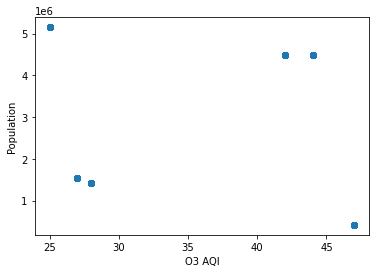

In [34]:
# Scatter plot to check the relation between O3 AQI from pollution data and Population from population data
plt.scatter(combined_df['O3 AQI'], combined_df['Population'])
plt.xlabel('O3 AQI')
plt.ylabel('Population');

In [35]:
# The scatter plat suggests that there may be a strong positive linear relationship between O3 AQI and Population

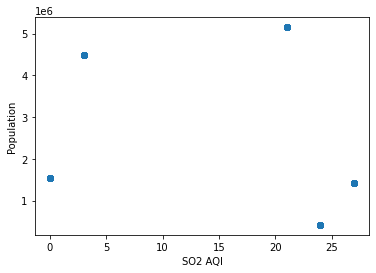

In [36]:
# Scatter plot to check the relation between SO2 AQI from pollution data and Population from population data
plt.scatter(combined_df['SO2 AQI'], combined_df['Population'])
plt.xlabel('SO2 AQI')
plt.ylabel('Population');

In [37]:
# The scatter plat suggests that there is no linear relationship between SO2 AQI and Population

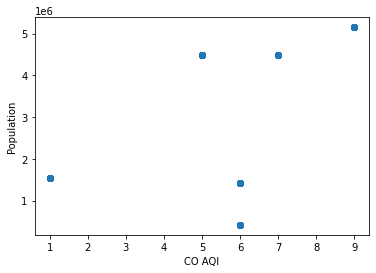

In [38]:
# Scatter plot to check the relation between CO AQI from pollution data and Population from population data
plt.scatter(combined_df['CO AQI'], combined_df['Population'])
plt.xlabel('CO AQI')
plt.ylabel('Population');

In [39]:
# The scatter plat suggests that there is no linear relationship between CO AQI and Population